# Решающие деревья для задач классификации и регрессии
Группа: ИВТ-М20.<br/>
Студент: Лискунов Роман Геннадьвич

In [1]:
import warnings
from typing import Union, Any

from numpy import arange
from pandas import (
    DataFrame,
    read_csv
)
from sklearn.metrics import (
    accuracy_score,
    r2_score,
    mean_absolute_error,
    classification_report
)
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV
)
from sklearn.tree import (
    DecisionTreeClassifier,
    DecisionTreeRegressor,
    export_graphviz,
    plot_tree
)

warnings.filterwarnings('ignore')


## 1. Прочтите данные из файлов

In [2]:
transformators: DataFrame = DataFrame(
    read_csv(
        'data/transformators.csv',
        sep=',',
        header=0
    )
)
regression: DataFrame = DataFrame(
    read_csv(
        'data/transformators_regression.csv',
        sep=',',
        header=0
    )
)

In [3]:
x = transformators.drop('label', axis=1)
y = transformators.label

## 2. Отобразите несколько первых и несколько последних записей.

In [4]:
print(transformators.head())
print(transformators.tail())
print(regression.head())
print(regression.tail())

         H2        CO      C2H4      C2H2  label
0  0.002590  0.016491  0.002876  0.000336      1
1  0.002825  0.014728  0.001992  0.000339      1
2  0.002764  0.017030  0.003394  0.000195      1
3  0.000508  0.016334  0.004104  0.000380      1
4  0.002654  0.021278  0.004068  0.000124      1
            H2        CO      C2H4      C2H2  label
2095  0.002549  0.009460  0.007465  0.000242      1
2096  0.000915  0.005770  0.007230  0.000081      3
2097  0.001565  0.002492  0.008529  0.000176      3
2098  0.001688  0.020291  0.007305  0.000252      1
2099  0.002935  0.028001  0.008048  0.000219      1
         H2        CO      C2H4      C2H2  label
0  0.002590  0.016491  0.002876  0.000336    541
1  0.002825  0.014728  0.001992  0.000339    520
2  0.002764  0.017030  0.003394  0.000195    583
3  0.000508  0.016334  0.004104  0.000380    487
4  0.002654  0.021278  0.004068  0.000124   1093
            H2        CO      C2H4      C2H2  label
2095  0.002549  0.009460  0.007465  0.000242   1

## 3. Разбейте данные для классификации

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, train_size=0.7)

## 4. Примените алгоритм дерева решений

In [6]:
clf: DecisionTreeClassifier = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier()

## 5. Сделайте предсказание на тестовой выборке.

In [7]:
pred: object = clf.predict(x_test)
print(f"Prediction: {pred}")
print(accuracy_score(y_test, pred, normalize=True))
print(classification_report(y_test, pred))


Prediction: [1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 4 3 1 1 4 1 1 1
 1 1 4 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 4 1 1 1 1 1 2 1 1 1 1 1 3 1 1 1 2 1
 1 1 1 1 1 1 4 1 1 2 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 3 1 1 1 3 1 1
 1 1 1 1 1 1 1 3 1 1 1 1 1 4 1 3 1 1 3 1 1 1 3 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 4 1 1 2 1 1 4 1 2 1 1 1 2 1 3 1 1 1 1 1 1 1 1 3 1 1 4 1 1 4
 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 4 1 1 1 1 1 1 4 1 1
 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 4 4 1 1 4 1 1 1 1 1 1 3 1 1 1 1 1 1 1
 1 1 1 1 4 1 1 1 1 1 1 4 1 1 1 1 1 1 4 4 4 2 1 1 1 1 1 1 1 1 4 1 1 1 1 4 1
 4 1 1 2 4 1 4 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 4 3 1 1 1 1 1 1 1 1 4 1 1 1 4
 1 1 1 1 1 4 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 4 1 1
 2 1 2 1 1 1 1 1 2 4 1 3 1 4 1 1 1 2 1 1 1 1 1 1 1 2 1 1 4 1 1 4 1 1 1 4 1
 3 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 3 1 1 1 1 3 1 1 1 1 1 3 1 4 1
 3 1 1 1 1 1 1 1 1 4 1 1 3 2 1 4 1 1 1 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 

## 6. Выполните подбор гиперпараметров модели

In [8]:
parameters: dict[str, Union[list[str], list[int]]] = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [x for x in range(0, 150, 10)],
    'min_samples_split': [x for x in range(0, 10, 2)],
    'min_samples_leaf': [x for x in range(0, 15, 3)]
}
grid: GridSearchCV = GridSearchCV(
    DecisionTreeClassifier(),
    parameters,
    cv=5
)
gs_result: Union[GridSearchCV, Any] = grid.fit(x_train, y_train)
print(gs_result)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [0, 10, 20, 30, 40, 50, 60, 70, 80, 90,
                                       100, 110, 120, 130, 140],
                         'min_samples_leaf': [0, 3, 6, 9, 12],
                         'min_samples_split': [0, 2, 4, 6, 8]})


## 7. Заново обучите модель с подобранными гиперпараметрами

In [9]:
print(gs_result.best_params_)
print(gs_result.best_score_)
print(gs_result.predict(x_test))

test = y_test
pred = gs_result.predict(x_test)
print(accuracy_score(y_test, pred, normalize=True))

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 9, 'min_samples_split': 2}
0.9108843537414966
[1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 4 3 1 1 4 1 1 1
 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1
 1 1 1 1 1 1 4 1 1 2 1 1 4 1 1 1 1 1 1 1 1 1 1 3 1 1 4 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 3 1 1 3 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 3 1 1 1 1 1 1 1 1 3 1 1 4 1 1 4
 1 1 1 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 4 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 4 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 4 4 1 1 1 1 1 4 1 1 1 1 1 1 3 4 4 4 1 1 1 1 1 1 1 1 4 1 1 1 1 4 1
 1 1 1 2 4 1 1 1 1 1 1 1 1 1 4 1 1 1 1 1 1 1 4 1 1 1 1 1 4 1 1 1 3 1 1 1 3
 1 1 1 1 1 4 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 1 1 1 4 1 1 1 1 1 1 1 1
 2 1 2 1 1 1 1 1 2 4 1 3 1 4 1 1 1 2 1 1 3 1 1 1 1 2 1 1 3 1 1 1 1 3 1 4 1
 3 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 3 1 1 1 1 1 3 1

## 8. Постройте итоговое дерево классификации

[Text(167.4, 195.696, 'X[1] <= 0.006\ngini = 0.328\nsamples = 1470\nvalue = [1194, 68, 79, 129]'),
 Text(73.656, 152.208, 'X[1] <= 0.002\ngini = 0.741\nsamples = 269\nvalue = [53, 68, 61, 87]'),
 Text(40.176, 108.72, 'X[2] <= 0.002\ngini = 0.394\nsamples = 79\nvalue = [0, 60, 11, 8]'),
 Text(26.784000000000002, 65.232, 'X[0] <= 0.001\ngini = 0.208\nsamples = 68\nvalue = [0, 60, 0, 8]'),
 Text(13.392000000000001, 21.744, '\n  (...)  \n'),
 Text(40.176, 21.744, '\n  (...)  \n'),
 Text(53.568000000000005, 65.232, 'gini = 0.0\nsamples = 11\nvalue = [0, 0, 11, 0]'),
 Text(107.13600000000001, 108.72, 'X[2] <= 0.004\ngini = 0.678\nsamples = 190\nvalue = [53, 8, 50, 79]'),
 Text(80.352, 65.232, 'X[0] <= 0.001\ngini = 0.519\nsamples = 115\nvalue = [25, 8, 7, 75]'),
 Text(66.96000000000001, 21.744, '\n  (...)  \n'),
 Text(93.74400000000001, 21.744, '\n  (...)  \n'),
 Text(133.92000000000002, 65.232, 'X[1] <= 0.004\ngini = 0.529\nsamples = 75\nvalue = [28, 0, 43, 4]'),
 Text(120.528, 21.744, '\n 

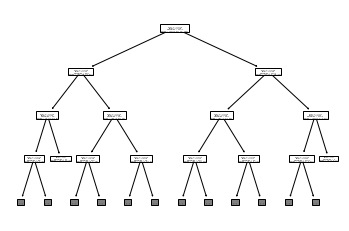

In [10]:
graph = export_graphviz(
    clf,
    out_file="data/transformators.dot",
    filled=True,
    rounded=True
)
plot_tree(clf, max_depth=3)

## 9. Разбейте данные для регрессии

In [11]:
r = regression.drop('label', axis=1)
ry = regression.label

In [12]:
var_train, var_test, target_train, target_test = train_test_split(r, ry, test_size=0.3, train_size=0.7)

## 10. Примените алгоритм дерева регрессии


In [13]:
clf: DecisionTreeRegressor = DecisionTreeRegressor()
clf.fit(var_train, target_train)

DecisionTreeRegressor()

## 11. Сделайте предсказание на тестовой выборке

In [14]:
test: object = target_test
pred: object = clf.predict(var_test)
print(f"Prediction: {pred}")
print(f"r2_score: {round(r2_score(test, pred), 3)}")
print(f"mean_absolute_error: {round(mean_absolute_error(test, pred), 3)}")

Prediction: [ 874.  426. 1093. 1093. 1093. 1093.  528. 1093. 1093. 1093.  812.  773.
  785.  636.  519. 1093. 1093.  566. 1093.  777.  739.  628. 1093.  738.
 1093. 1093.  586. 1093. 1093.  618. 1093.  661.  779.  789.  586.  491.
  590.  676.  494. 1093.  939.  657. 1093.  540.  802.  636.  472.  762.
  764.  514.  714.  555.  475.  526.  831.  851.  502. 1093. 1093. 1093.
  980. 1093. 1093.  675.  518. 1093.  537.  764. 1093.  499.  843.  710.
  481.  786.  671.  888.  518.  612.  728.  717.  615.  518. 1093. 1093.
  528.  704.  451.  489.  537.  759. 1093. 1093. 1093. 1093.  928.  705.
 1093. 1093.  714.  823.  765. 1093.  835.  704.  496.  582. 1093.  596.
  482. 1093. 1093.  460.  815.  526.  464.  546.  616.  586. 1093.  520.
  842. 1093.  785.  591.  625.  721.  627. 1093.  443. 1093.  572. 1092.
  490.  472.  658.  586. 1093.  851.  542.  549.  581.  651. 1093.  473.
  639.  738.  732.  398. 1093.  799.  636. 1093. 1093. 1093.  738. 1093.
 1093.  577.  520.  493.  907.  740. 10

## 12. Выполните подбор гиперпараметров модели

In [15]:
parameters: dict[str, Union[list[str], list[int]]] = {
    'splitter': ('best', 'random'),
    'max_depth': arange(1, 10),
    'min_samples_split': arange(2, 10),
    'min_samples_leaf': arange(1, 5)
}
grid: GridSearchCV = GridSearchCV(
    DecisionTreeRegressor(),
    parameters,
    cv=5
)
gs_result: Union[GridSearchCV, Any] = grid.fit(var_train, target_train)
print(gs_result)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([1, 2, 3, 4]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ('best', 'random')})


## 13. Заново обучите модель с подобранными гиперпараметрам

In [16]:
print(gs_result.best_params_)
print(gs_result.best_score_)
print(gs_result.predict(var_test))
pred: object = gs_result.predict(var_test)
print(f"r2_score: {round(r2_score(test, pred), 3)}")
print(f"mean_absolute_error: {round(mean_absolute_error(test, pred), 3)}")

{'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 5, 'splitter': 'best'}
0.2764661202191444
[ 835.23636364  445.2         944.92657343  835.23636364  690.51879699
  944.92657343  575.59090909  835.23636364 1038.01709402  944.92657343
  531.75        944.92657343  731.47126437  690.51879699  690.51879699
 1038.01709402  944.92657343  575.59090909  690.51879699  944.92657343
  835.23636364  835.23636364 1038.01709402  783.52307692  944.92657343
  778.02189781  835.23636364 1038.01709402  944.92657343  778.02189781
  778.02189781  835.23636364  835.23636364  944.92657343  902.86486486
  690.51879699  778.02189781  835.23636364  731.47126437  783.52307692
  835.23636364  690.51879699  944.92657343  835.23636364  731.47126437
  783.52307692  603.38461538  835.23636364  835.23636364  731.47126437
  778.02189781  944.92657343  510.16666667  944.92657343 1038.01709402
  944.92657343  603.38461538  944.92657343  778.02189781  944.92657343
  835.23636364  783.52307692  778.02189781  7

## 14. Постройте итоговое дерево регрессии

[Text(167.4, 195.696, 'X[0] <= 0.002\nmse = 59291.543\nsamples = 1470\nvalue = 794.387'),
 Text(83.7, 152.208, 'X[2] <= 0.008\nmse = 57271.235\nsamples = 1089\nvalue = 835.01'),
 Text(41.85, 108.72, 'X[3] <= 0.0\nmse = 52371.744\nsamples = 932\nvalue = 866.08'),
 Text(20.925, 65.232, 'X[1] <= 0.018\nmse = 45594.786\nsamples = 753\nvalue = 900.345'),
 Text(10.4625, 21.744, '\n  (...)  \n'),
 Text(31.387500000000003, 21.744, '\n  (...)  \n'),
 Text(62.775000000000006, 65.232, 'X[3] <= 0.0\nmse = 55164.505\nsamples = 179\nvalue = 721.939'),
 Text(52.3125, 21.744, '\n  (...)  \n'),
 Text(73.2375, 21.744, '\n  (...)  \n'),
 Text(125.55000000000001, 108.72, 'X[2] <= 0.009\nmse = 46606.093\nsamples = 157\nvalue = 650.567'),
 Text(104.625, 65.232, 'X[3] <= 0.0\nmse = 49342.148\nsamples = 133\nvalue = 674.955'),
 Text(94.16250000000001, 21.744, '\n  (...)  \n'),
 Text(115.0875, 21.744, '\n  (...)  \n'),
 Text(146.475, 65.232, 'X[2] <= 0.01\nmse = 9882.16\nsamples = 24\nvalue = 515.417'),
 Text(

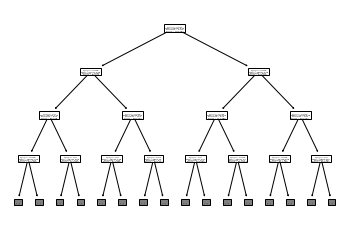

In [17]:
graph = export_graphviz(
    clf,
    out_file="data/regression.dot",
    filled=True,
    rounded=True
)
plot_tree(clf, max_depth=3)

# Ответы на контрольные вопросы

## 1. Опишите этапы построения алгоритма дерева решений для задачи классификации и регрессии. Чем они отличаются и чем схожи?

Деревья решений как аналитические модели более вербализуемы и интерпретируемы, чем, скажем, нейронные сети. В обучающем множестве для примеров должно быть задано целевое значение, т.к. деревья решений являются моделями, строящимися на основе обучения с учителем. При этом, если целевая переменная дискретная (метка класса), то модель называют деревом классификации, а если непрерывная, то деревом регрессии.

Собственно, само дерево решений — это метод представления решающих правил в иерархической структуре, состоящей из элементов двух типов — узлов (node) и листьев (leaf). В узлах находятся решающие правила и производится проверка соответствия примеров этому правилу по какому-либо атрибуту обучающего множества.

В простейшем случае, в результате проверки, множество примеров, попавших в узел, разбивается на два подмножества, в одно из которых попадают примеры, удовлетворяющие правилу, а в другое — не удовлетворяющие.

Затем к каждому подмножеству вновь применяется правило и процедура рекурсивно повторяется пока не будет достигнуто некоторое условие остановки алгоритма. В результате в последнем узле проверка и разбиение не производится и он объявляется листом. Лист определяет решение для каждого попавшего в него примера. Для дерева классификации — это класс, ассоциируемый с узлом, а для дерева регрессии — соответствующий листу модальный интервал целевой переменной.

Таким образом, в отличие от узла, в листе содержится не правило, а подмножество объектов, удовлетворяющих всем правилам ветви, которая заканчивается данным листом.

Очевидно, чтобы попасть в лист, пример должен удовлетворять всем правилам, лежащим на пути к этому листу. Поскольку путь в дереве к каждому листу единственный, то и каждый пример может попасть только в один лист, что обеспечивает единственность решения.

В ходе построения дерева решений нужно решить несколько основных проблем, с каждой из которых связан соответствующий шаг процесса обучения:

Выбор атрибута, по которому будет производиться разбиение в данном узле (атрибута разбиения).
Выбор критерия остановки обучения.
Выбор метода отсечения ветвей (упрощения).
Оценка точности построенного дерева.

## 2. Какие метрики используются для оценки качества работы алгоритмов при решении задачи регрессии? Опишите данные метрики с математической точки зрения и скажите, чем они отличаются друг от друга.

1.	Cредняя абсолютная ошибка (англ. Mean Absolute Error, MAE)
Среднеквадратичный функционал сильнее штрафует за большие отклонения по сравнению со среднеабсолютным, и поэтому более чувствителен к выбросам. При использовании любого из этих двух функционалов может быть полезно проанализировать, какие объекты вносят наибольший вклад в общую ошибку — не исключено, что на этих объектах была допущена ошибка при вычислении признаков или целевой величины.
Среднеквадратичная ошибка подходит для сравнения двух моделей или для контроля качества во время обучения, но не позволяет сделать выводов о том, на сколько хорошо данная модель решает задачу. Например, MSE = 10 является очень плохим показателем, если целевая переменная принимает значения от 0 до 1, и очень хорошим, если целевая переменная лежит в интервале (10000, 100000). В таких ситуациях вместо среднеквадратичной ошибки полезно использовать коэффициент детерминации — R^2

2.	Средняя квадратичная ошибка (англ. Mean Squared Error, MSE)
MSE применяется в ситуациях, когда нам надо подчеркнуть большие ошибки и выбрать модель, которая дает меньше больших ошибок прогноза. Грубые ошибки становятся заметнее за счет того, что ошибку прогноза мы возводим в квадрат. И модель, которая дает нам меньшее значение среднеквадратической ошибки, можно сказать, что что у этой модели меньше грубых ошибок.

3.	Корень из средней квадратичной ошибки (англ. Root Mean Squared Error, RMSE)
Примерно такая же проблема, как и в MAPE: так как каждое отклонение возводится в квадрат, любое небольшое отклонение может значительно повлиять на показатель ошибки. Стоит отметить, что существует также ошибка MSE, из которой RMSE как раз и получается путем извлечения корня.

4.	Средняя абсолютная процентная ошибка (англ. Mean Absolute Percentage Error, MAPE)
Это коэффициент, не имеющий размерности, с очень простой интерпретацией. Его можно измерять в долях или процентах. Если у вас получилось, например, что MAPE=11.4%, то это говорит о том, что ошибка составила 11,4% от фактических значений. Основная проблема данной ошибки — нестабильность.

5.	Коэффициент детерминации
Коэффициент детерминации измеряет долю дисперсии, объясненную моделью, в общей дисперсии целевой переменной. Фактически, данная мера качества — это нормированная среднеквадратичная ошибка. Если она близка к единице, то модель хорошо объясняет данные, если же она близка к нулю, то прогнозы сопоставимы по качеству с константным предсказанием.

## 3. Каким способом можно повысить качество работы алгоритмов регрессии?

Чтобы повысить качество кластеризации у нас есть два варианта. 1) Применить метрики, посмотреть результат и попробовать другой метод(алгоритм) кластеризации. 2) Применить метрики, посмотреть результат и изменить или добавить информативные признаки.(Это исходя из пункта 21 самой работы)

На повышение качества работы алгоритма оказывают влияние правильно подобранные гиперпараметры. Есть три подхода в оптимизации гиперпараметров: Байесовская оптимизация, поиск по решетке и случайный поиск. Как правило, самым эффективным подходом оказывается Байесовская оптимизация.
1) Байесовская оптимизация - значения гиперпараметров в текущей итерации выбираются с учётом результатов на предыдущем шаге. Основная идея алгоритма заключается в следующем – на каждой итерации подбора находится компромисс между исследованием регионов с самыми удачными из найденных комбинаций гиперпараметров и исследованием регионов с большой неопределённостью (где могут находиться ещё более удачные комбинации).
2) Поиск по решётке - в этом способе значения гиперпараметров задаются вручную, затем выполняется их полный перебор. Популярной реализацией этого метода является Grid Search из sklearn.